In [328]:
import pandas as pd
import matplotlib.pyplot as plt

In [329]:
sales_report= pd.read_excel('2021jun15-oct.xlsx',engine='openpyxl',header=0,skiprows=5)

In [330]:
print(sales_report.head())

                           Product                Category        Unit  \
0                              NaN                 Service        Item   
1                    1 Water 355ml  Non Alcoholic Beverage        Item   
2  123 Organic Anejo Tequila 750ml                 Tequila        Item   
3  123 Organic Anejo Tequila 750ml                 Tequila        Item   
4  123 Organic Anejo Tequila 750ml                 Tequila  Item Total   

            Customer  Quantity  Invoice    Sale      COGS   Profit  
0  Customer Square 1         2    54.13   50.00    0.0000  50.0000  
1  Customer Square 1         1     1.50    1.50    0.1246   1.3754  
2  Customer Square 1         2   129.88  119.98   88.1300  31.8500  
3  Customer Square 2         4   259.76  239.96  176.2600  63.7000  
4                NaN         6   389.64  359.94  264.3900  95.5500  


In [331]:
list_of_retail_stores = ['Customer Square 1','Customer Square 2','Customer Square 3'] #use this below in future version

In [332]:
sales_retail = sales_report[(sales_report['Customer'] == 'Customer Square 1') | (sales_report['Customer'] == 'Customer Square 2') | (sales_report['Customer'] == 'Customer Square 3')]

In [333]:
sales_pivot = sales_retail.pivot(columns='Customer',index='Product',values='Quantity')
sales_pivot.index.name = sales_pivot.columns.name = None
sales_pivot.reset_index(inplace=True)
sales = sales_pivot.rename(columns={'index':'Product','Customer Square 1':'AP','Customer Square 2':'PV','Customer Square 3':'OH'})
#print(sales.columns)

In [334]:
#print(sales_report.loc[sales_report['Product'] == 'Zwack Liqueur 750ml'].head(1).Category.to_string(index=False))
find_category = lambda x : sales_report.loc[sales_report['Product'] == x['Product']].head(1).Category.to_string(index=False)
#find_price = lambda x : sales_report.loc[sales_report['Retail']]#requires another imported worksheet you'd generate in Dear

In [335]:
sales['Category'] = sales.apply(find_category,axis=1)
sales.fillna(0,inplace=True)#replace null values anywhere with zero
sales['Total'] = sales.AP + sales.PV + sales.OH
#print(sales.head(10))
sales

,Product,AP,PV,OH,Category,Total
0,0,2.0,0.0,0.0,"Series([], )",2.0
1,1 Water 355ml,1.0,0.0,0.0,Non Alcoholic Beverage,1.0
2,123 Organic Anejo Tequila 750ml,2.0,4.0,0.0,Tequila,6.0
3,123 Organic Blanco Tequila 750ml,1.0,4.0,0.0,Tequila,5.0
4,123 Organic Reposado Tequila 750ml,2.0,3.0,0.0,Tequila,5.0
...,...,...,...,...,...,...
3667,Zirbenz Stone Pine Liqueur 750ml,1.0,0.0,1.0,Liqueur,2.0
3668,Zubrowka Bison Grass Vodka 750ml,6.0,18.0,5.0,Vodka,29.0
3669,Zucca Rabarbaro 750ml,2.0,6.0,1.0,Amaro,9.0
3670,Zwack Liqueur 750ml,1.0,3.0,1.0,Amaro,5.0


In [336]:
print(sales.Category.unique())

wine_list = ['Bubbles','Red New World','Red Old World','Orange Wine','White','Red']
bad_cats = ['Red']#add whatever else is bad, manually edit in the next cell
print(sales[sales['Category'].isin(bad_cats)])
#sales[sales['Category'] == 'Red']

['Series([], )' 'Non Alcoholic Beverage' 'Tequila' 'Bubbles'
 'Whiskey Bourbon/American' 'Vodka' 'Mixer' 'Craft Beer' 'Red New World'
 'Mezcal' 'Bag' 'Liqueur' 'Whiskey Mexican' 'Whiskey Scotch' 'Bar Tools'
 'Glassware' 'Absinthe' 'Garnish' 'Rum' 'Retail' 'Whiskey Japanese'
 'Fortified' 'Gin' 'Bitters' 'Amaro' 'Books' 'White' 'Tobacco'
 'Red Old World' 'Whiskey American Single Malt' 'Whiskey Rye' 'Cider'
 'Cachaca' 'Ice' 'Rose' 'Orange Wine' 'Shochu' 'RTD' 'Brandy' 'Imp Beer'
 'Snacks' 'Whiskey French' 'Aquavit' 'Dom Beer' 'Whiskey Irish' 'Cognac'
 'Whiskey Canadian' 'Soju' 'Mead' 'Calvados' 'Sake' 'Sotol' 'Service'
 'Whisky German' 'Red' 'Fruit' 'Other' 'Whiskey Taiwaneese' 'Pisco'
 'Raicilla' 'Grappa' 'Baijiu' 'Whiskey Indian' 'Bacanora' 'Pox' 'Singani'
 'Charanda']
                                       Product    AP    PV   OH Category  \
1394             Field Recordings Freddo 750ml   5.0  24.0  7.0      Red   
1396  Field Recordings PPP Sparkling Red 750ml  10.0  31.0  0.0      

In [337]:
sales.at[1394,'Category'] = 'Red New World'
sales.at[1396,'Category'] = 'Red New World'
sales.at[2345,'Category'] = 'Red Old World'

<AxesSubplot:ylabel='Total'>

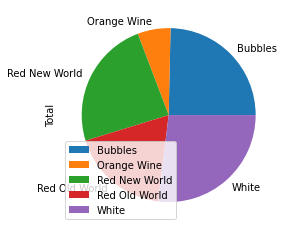

In [338]:
sales = sales[sales['Category'] != 'Series([], )']
by_cat = sales.groupby('Category').sum().reset_index()
by_cat['Total'] = by_cat.AP + by_cat.PV + by_cat.OH
#print(by_cat.head(20))
by_cat.index = by_cat.Category.to_list()
#print(by_cat.index)
by_cat[by_cat.Category.isin(wine_list)].plot.pie(y='Total')

<AxesSubplot:ylabel='None'>

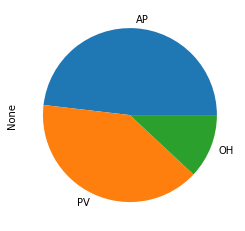

In [339]:
sales[sales.columns[1:4]].sum().plot.pie()

In [356]:
print(sales.sort_values(by='OH',ascending=False).head(20))

                              Product      AP      PV      OH  \
1099                         Discount  1747.0  2360.0  1379.0   
1408                    Fireball 50ml  1772.0  1593.0   562.0   
2513  New Amsterdam Pink Whitney 50ml   872.0   574.0   246.0   
3417               Tullamore Dew 50ml   185.0   244.0   213.0   
1012             Deep Eddy Lemon 50ml   140.0   308.0   198.0   
1021             Deep Eddy Peach 50ml    30.0    71.0   174.0   
1015              Deep Eddy Lime 50ml    82.0   303.0   161.0   
1023             Deep Eddy Plain 50ml    30.0    76.0   148.0   
35                    99 Bananas 50ml   389.0    75.0   131.0   
2461           Monopolowa Vodka 375ml   162.0    57.0   120.0   
3555    Western Son Prickly Pear 50ml     0.0     0.0    76.0   
3557      Western Son Watermelon 50ml     0.0     0.0    72.0   
3366                Titos Vodka 1.75L   149.0   256.0    70.0   
563                    Budweiser 25oz   311.0     0.0    70.0   
3550       Western Son Bl

In [355]:
print(sales[sales['Category'].isin(wine_list)].sort_values(by='Total',ascending=False).head())
sales[sales['Category'].isin(wine_list)].sort_values(by='Total',ascending=False).to_csv('winetocloseout.csv',index=False)
#sales

                                     Product     AP     PV    OH  \
371        Better Half Sauvignon Blanc 750ml  134.0  187.0  34.0   
3645                      Wycliff Brut 750ml   57.0  165.0   0.0   
1249                  El Jefe Tempranillo 1L   63.0   49.0  19.0   
145   Ant Moore Sauvignon Blanc Estate 750mL   31.0   42.0  40.0   
89            Alias Cabernet Sauvignon 750ml   20.0   79.0   0.0   

           Category  Total  
371           White  355.0  
3645        Bubbles  222.0  
1249  Red Old World  131.0  
145           White  113.0  
89    Red New World   99.0  


PermissionError: [Errno 13] Permission denied: 'winetocloseout.csv'